# Data Visulaization 2 Assignment

About the dataset:



In [3]:
# Importing required libraries
import pandas as pd
from dash import Dash 
# dcc includes Graphs
from dash import html, dcc 
# for the interactive part:
from dash import callback, Output, Input
import plotly.express as px

In [4]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/zsofiarebeka/DataViz2/main/NYC_Collisions.csv')

# checking it out
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [5]:
df.Borough.value_counts()

Brooklyn         76416
Queens           63751
Bronx            41255
Manhattan        38234
Staten Island    11568
Name: Borough, dtype: int64

In [7]:
df.Date.value_counts()

2021-05-27    433
2021-05-14    411
2021-06-17    388
2021-06-18    387
2021-11-05    386
             ... 
2021-01-10    177
2023-01-07    176
2023-04-07    164
2023-04-08    162
2023-04-09    149
Name: Date, Length: 829, dtype: int64

In [12]:
# adding a helper count column to aggregate
df['Cnt'] = 1
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Cnt
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0,1
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1


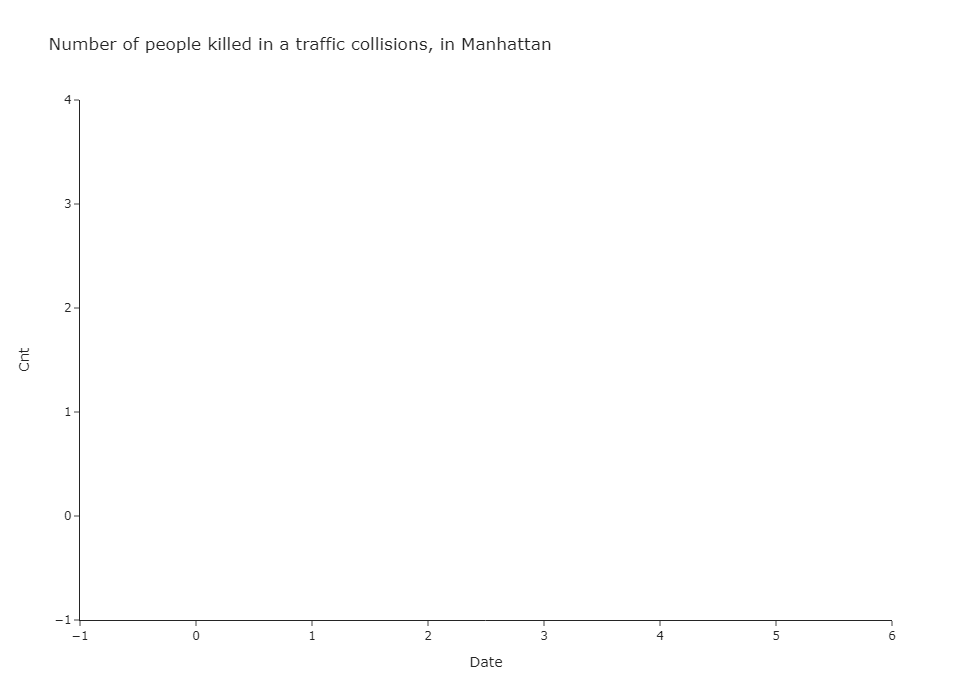

In [19]:
# filtering the dataframe
manhattan_data = df[(df['Borough'] == 'Manhattan') & (df['Date'] == 2021)]


# Creating a scatterplot
scatter = px.scatter(manhattan_data, x = 'Date', y = 'Cnt', title = 'Number of people killed in a traffic collisions, in Manhattan', 
                        template = 'simple_white', height = 700, width = 800)

scatter.update_traces(textposition= 'top center')
scatter